<a href="https://colab.research.google.com/github/wayoo2019/Time-Series-analysis/blob/main/475_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 275/475 Time Series Analysis and Forecasting in Data Science

*   Yuan Wang | Yiwei Li
*   ywang340  | yli253



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%% dependencies and definitions
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Question 1

## Q1.a & 1.b

display the original data 

In [ ]:
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 40)
    plt.savefig(filename)
    # plt.close()
    plt.show()

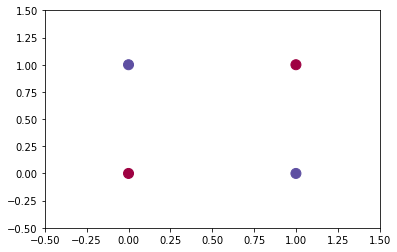

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/475 Time Series/Project 2/XOR.csv") 
X = data.values[:, 0:2]  # Take only the first two features. 
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 100)
plt.xlim(-0.5, 1.5) 
plt.ylim(-0.5, 1.5)
plt.show()

##1.a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.7074780464172363
Training accuracy is  0.5
Epoch  10 Loss  0.6959749460220337
Training accuracy is  0.5
Epoch  20 Loss  0.6922118067741394
Training accuracy is  0.5
Epoch  30 Loss  0.6907248497009277
Training accuracy is  0.5
Epoch  40 Loss  0.6884499192237854
Training accuracy is  0.75
Epoch  50 Loss  0.6814606189727783
Training accuracy is  0.75
Epoch  60 Loss  0.6490839719772339


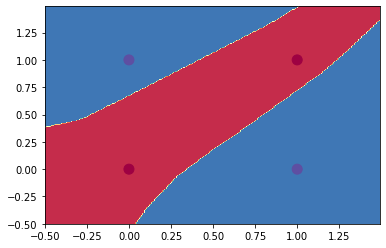

Training accuracy is  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 100)
    plt.savefig(filename)

    # plt.close()
    plt.show()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 100)
    plt.savefig(filename)
    # plt.close()
    plt.show()

#%% read data

###
data = pd.read_csv("/content/drive/MyDrive/475 Time Series/Project 2/XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

# plot_data(X,y,'data.pdf')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 100)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .1
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000 #10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        # Question 1a:
        if accuracy == 1:
          plot_decision_boundary(net, X, y, '1a.pdf')
          break

        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)


**1.a Comments**: Our model takes 60 Epoch to reach accuracy = 1 

## 1.b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.692938506603241
Training accuracy is  0.5
Epoch  10 Loss  0.6919634342193604
Training accuracy is  0.5
Epoch  20 Loss  0.6891791224479675
Training accuracy is  0.5
Epoch  30 Loss  0.6801888346672058
Training accuracy is  1.0
Epoch  40 Loss  0.6322432160377502
Training accuracy is  1.0
Epoch  50 Loss  0.1804620921611786
Training accuracy is  1.0
Epoch  60 Loss  0.0001351678220089525
Training accuracy is  1.0
Epoch  70 Loss  5.364414619180025e-07


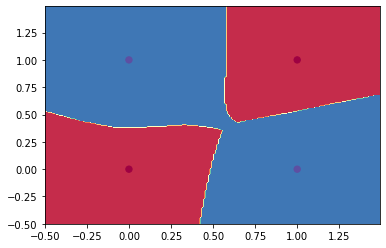

Training accuracy is  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 40)
    plt.savefig(filename)
    # plt.close()
    plt.show()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 40)
    plt.savefig(filename)
    # plt.close()
    plt.show()

#%% read data

###
data = pd.read_csv("/content/drive/MyDrive/475 Time Series/Project 2/XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

# plot_data(X,y,'data.pdf')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .1
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000 #10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        # Question 1a:
        # if accuracy == 1:
        #   plot_decision_boundary(net, X, y, '1a.pdf')
          #  break
        # Question 1b:
        if loss.item() < 0.0001:
          plot_decision_boundary(net, X, y, '1b.pdf')
          break

        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

**1.b Comments**: Our nn model takes 70 Epoch to reach loss < 0.0001

##Q1.c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Epoch  0 Loss  0.695199728012085
Training accuracy is  0.5
Epoch  10 Loss  0.6745842099189758
Training accuracy is  0.75
Epoch  20 Loss  0.6256397366523743
Training accuracy is  0.75
Epoch  30 Loss  0.5505359172821045
Training accuracy is  0.75
Epoch  40 Loss  0.4933389127254486
Training accuracy is  0.75
Epoch  50 Loss  0.47187432646751404
Training accuracy is  0.75
Epoch  60 Loss  0.4461062550544739
Training accuracy is  0.75
Epoch  70 Loss  0.3854372203350067
Training accuracy is  0.75
Epoch  80 Loss  0.2729516625404358


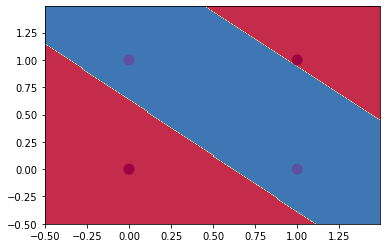

Training accuracy is  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2) # Question 1c: use only two layers with two units

        self.fc6 = nn.Linear(2, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))

        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 40)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 100)
    plt.savefig(filename)
    # plt.close()
    plt.show()

#%% read data

###
data = pd.read_csv("/content/drive/MyDrive/475 Time Series/Project 2/XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#plot_data(X,y,'data.pdf')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 100)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .1
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000 #10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        # question 1c:
        if accuracy == 1:
          plot_decision_boundary(net, X, y, '1c.pdf')
          break
        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)


**1.c Comments**: 
The model that we used contains 0 hidden layer, 1 input layer with 2 neurons, and 1 output layer with 2 neurons. It achieved achieve accuracy = 1 at epoch = 80 (the best is 10)

#Question 2

##Q2.a

Plot 2.a data

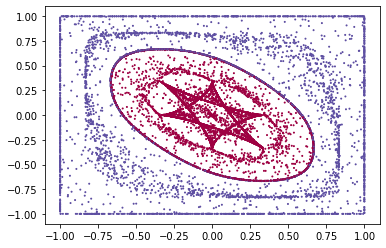

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/475 Time Series/Project 2/FeedForward_Data_ellipse(1).csv") 
X = data.values[:, 0:2]  # Take only the first two features. 
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6955491900444031
Training accuracy is  0.44346780857937046
Epoch  10 Loss  0.6861901879310608
Training accuracy is  0.5565321914206296
Epoch  20 Loss  0.680414080619812
Training accuracy is  0.5565321914206296
Epoch  30 Loss  0.6640762686729431
Training accuracy is  0.5565321914206296
Epoch  40 Loss  0.6083548665046692
Training accuracy is  0.764931259860266
Epoch  50 Loss  0.4952261447906494
Training accuracy is  0.8568852828487717
Epoch  60 Loss  0.32867228984832764
Training accuracy is  0.8858838554578919
Epoch  70 Loss  0.2207392007112503
Training accuracy is  0.8951243332582075
Epoch  80 Loss  0.2025468796491623
Training accuracy is  0.8982044925249794
Epoch  90 Loss  0.1979530304670334
Training accuracy is  0.8983547441965292
Epoch  100 Loss  0.19659201800823212
Training accuracy is  0.8990308767185035
Epoch  110 Loss  0.19477586448192596
Training accuracy is  0.8986552475396289
Epoch  120 Loss  0.1956966519355774
Training accuracy is  0.9000075125835775
Epoch  1

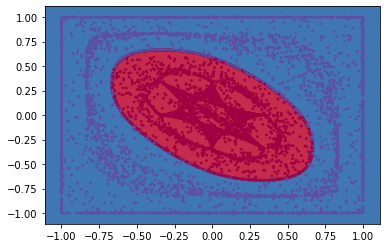

Epoch  2070 Loss  0.1726849377155304
Training accuracy is  0.9481631733153031


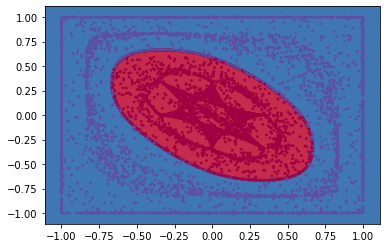

Epoch  2080 Loss  0.17283311486244202
Training accuracy is  0.948313424986853


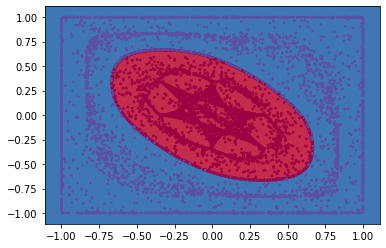

Epoch  2090 Loss  0.17221057415008545
Training accuracy is  0.9484636766584028


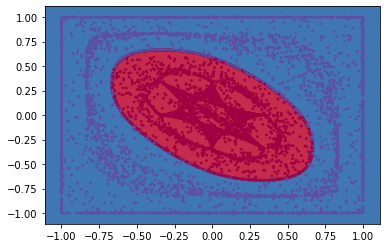

Epoch  2100 Loss  0.17189568281173706
Training accuracy is  0.948238299151078


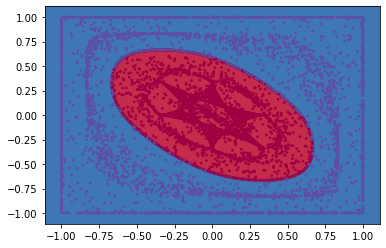

Epoch  2110 Loss  0.1717139333486557
Training accuracy is  0.9483885508226279


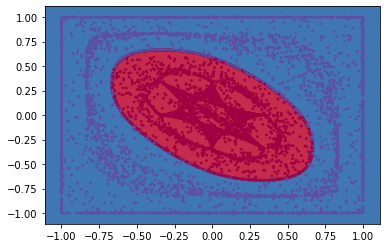

Epoch  2120 Loss  0.17206598818302155
Training accuracy is  0.9480880474795282


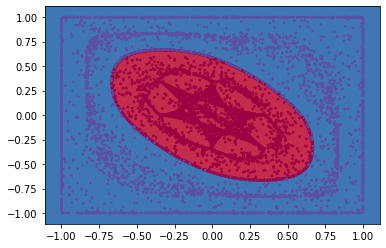

Epoch  2130 Loss  0.17219270765781403
Training accuracy is  0.9481631733153031


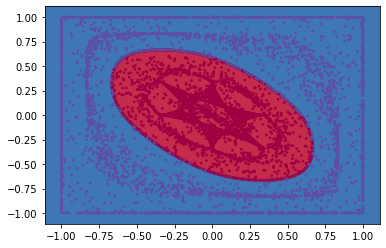

Epoch  2140 Loss  0.1722898781299591
Training accuracy is  0.948238299151078


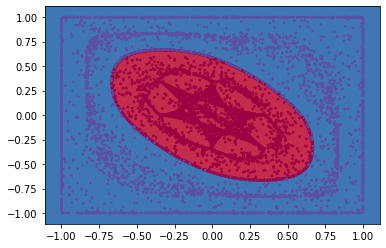

Epoch  2150 Loss  0.1716453731060028
Training accuracy is  0.9470362857786793
Epoch  2160 Loss  0.17131130397319794
Training accuracy is  0.9485388024941778


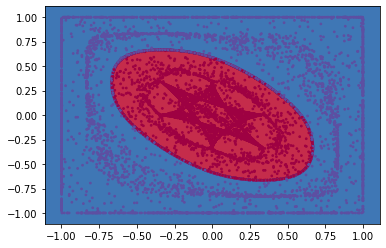

Epoch  2170 Loss  0.17169341444969177
Training accuracy is  0.9441815040192322
Epoch  2180 Loss  0.17218215763568878
Training accuracy is  0.9435804973330328
Epoch  2190 Loss  0.1714787781238556
Training accuracy is  0.9338892645180678
Epoch  2200 Loss  0.17124152183532715
Training accuracy is  0.9349410262189167
Epoch  2210 Loss  0.17039988934993744
Training accuracy is  0.9348659003831418
Epoch  2220 Loss  0.17060735821723938
Training accuracy is  0.9456088948989557
Epoch  2230 Loss  0.17128752171993256
Training accuracy is  0.9468109082713545
Epoch  2240 Loss  0.17094866931438446
Training accuracy is  0.9486890541657276


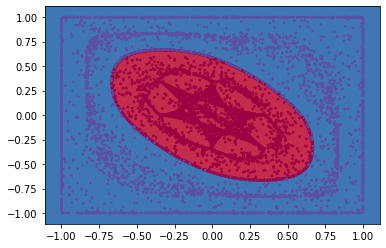

Epoch  2250 Loss  0.1708805114030838
Training accuracy is  0.9484636766584028


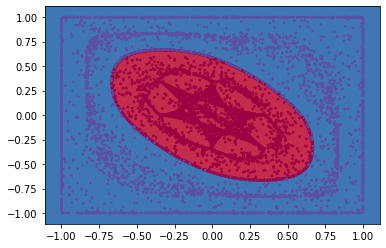

Epoch  2260 Loss  0.1709190160036087
Training accuracy is  0.9489895575088273


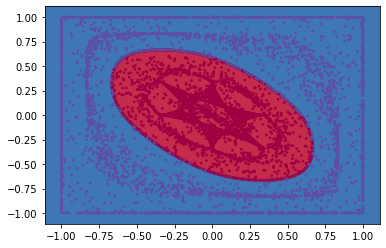

Epoch  2270 Loss  0.17159216105937958
Training accuracy is  0.9480880474795282


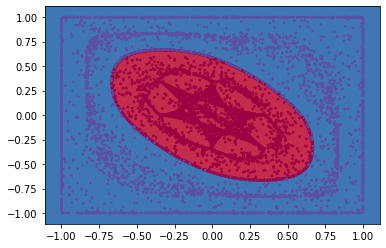

Epoch  2280 Loss  0.17184217274188995
Training accuracy is  0.948313424986853


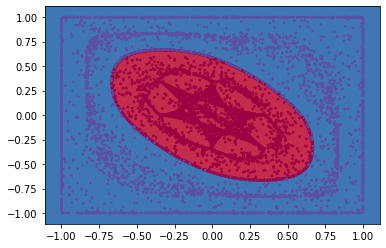

Epoch  2290 Loss  0.17113184928894043
Training accuracy is  0.9486890541657276


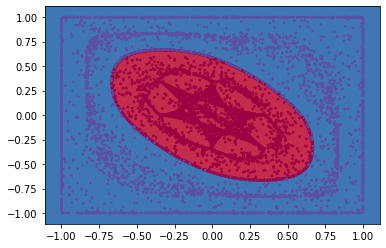

Epoch  2300 Loss  0.1705448478460312
Training accuracy is  0.9471114116144542
Epoch  2310 Loss  0.17059047520160675
Training accuracy is  0.9484636766584028


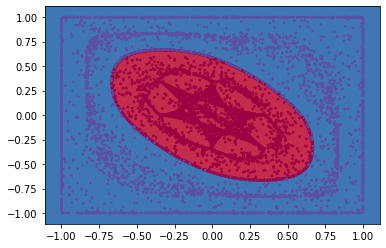

Epoch  2320 Loss  0.17074285447597504
Training accuracy is  0.9438810006761326
Epoch  2330 Loss  0.17111612856388092
Training accuracy is  0.9445571331981069
Epoch  2340 Loss  0.17038138210773468
Training accuracy is  0.9382465629930133
Epoch  2350 Loss  0.17020761966705322
Training accuracy is  0.9398993313800617
Epoch  2360 Loss  0.16994787752628326
Training accuracy is  0.9366689204417399
Epoch  2370 Loss  0.17031461000442505
Training accuracy is  0.9437307490045826
Epoch  2380 Loss  0.17020083963871002
Training accuracy is  0.9429794906468334
Epoch  2390 Loss  0.1701129525899887
Training accuracy is  0.9481631733153031


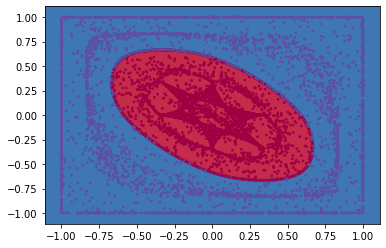

Epoch  2400 Loss  0.17001885175704956
Training accuracy is  0.9469611599429044
Epoch  2410 Loss  0.16988418996334076
Training accuracy is  0.9487641800015025


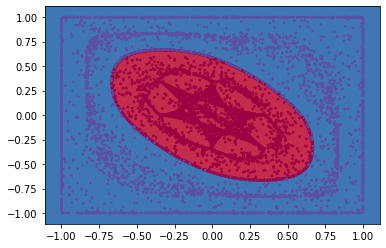

Epoch  2420 Loss  0.17017771303653717
Training accuracy is  0.9476372924648787
Epoch  2430 Loss  0.17076629400253296
Training accuracy is  0.9486139283299526


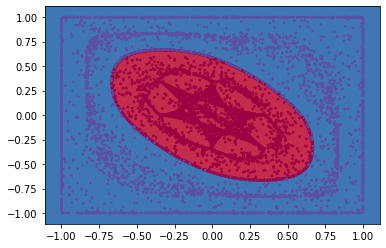

Epoch  2440 Loss  0.1705569177865982
Training accuracy is  0.9464352790924799
Epoch  2450 Loss  0.1699831485748291
Training accuracy is  0.9478626699722035
Epoch  2460 Loss  0.1697712540626526
Training accuracy is  0.9442566298550071
Epoch  2470 Loss  0.1699650138616562
Training accuracy is  0.9456088948989557
Epoch  2480 Loss  0.16991692781448364
Training accuracy is  0.9401247088873864
Epoch  2490 Loss  0.16994181275367737
Training accuracy is  0.94140184809556
Epoch  2500 Loss  0.169566348195076
Training accuracy is  0.9371948012921644
Epoch  2510 Loss  0.16963975131511688
Training accuracy is  0.9432048681541582
Epoch  2520 Loss  0.16909778118133545
Training accuracy is  0.9418526031102096
Epoch  2530 Loss  0.16934850811958313
Training accuracy is  0.9467357824355795
Epoch  2540 Loss  0.16931594908237457
Training accuracy is  0.9457591465705056
Epoch  2550 Loss  0.16939818859100342
Training accuracy is  0.9480129216437533


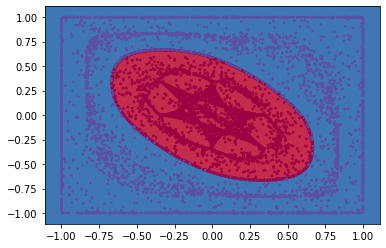

Epoch  2560 Loss  0.16997022926807404
Training accuracy is  0.9465104049282548
Epoch  2570 Loss  0.16994522511959076
Training accuracy is  0.947336789121779
Epoch  2580 Loss  0.16924460232257843
Training accuracy is  0.9460596499136052
Epoch  2590 Loss  0.16924411058425903
Training accuracy is  0.9475621666291038
Epoch  2600 Loss  0.16929930448532104
Training accuracy is  0.9432799939899331
Epoch  2610 Loss  0.16941840946674347
Training accuracy is  0.9455337690631809
Epoch  2620 Loss  0.16921177506446838
Training accuracy is  0.9401247088873864
Epoch  2630 Loss  0.1690482795238495
Training accuracy is  0.9423784839606341
Epoch  2640 Loss  0.16850674152374268
Training accuracy is  0.9388475696792127
Epoch  2650 Loss  0.16854484379291534
Training accuracy is  0.9435804973330328
Epoch  2660 Loss  0.16857877373695374
Training accuracy is  0.9421531064533093
Epoch  2670 Loss  0.1687740981578827
Training accuracy is  0.9466606565998047
Epoch  2680 Loss  0.1687869429588318
Training accuracy 

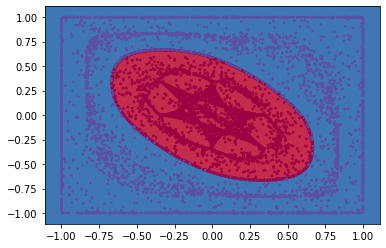

Epoch  3820 Loss  0.1649738997220993
Training accuracy is  0.947336789121779
Epoch  3830 Loss  0.16392536461353302
Training accuracy is  0.9484636766584028


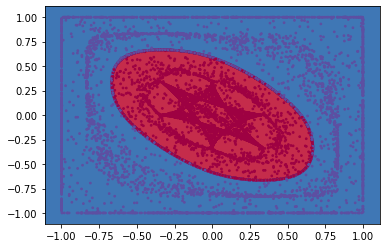

Epoch  3840 Loss  0.16347277164459229
Training accuracy is  0.947261663286004
Epoch  3850 Loss  0.165434792637825
Training accuracy is  0.9477875441364285
Epoch  3860 Loss  0.16476809978485107
Training accuracy is  0.9465104049282548
Epoch  3870 Loss  0.16366730630397797
Training accuracy is  0.948238299151078


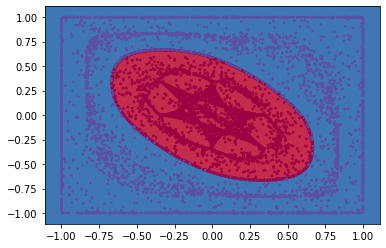

Epoch  3880 Loss  0.16354505717754364
Training accuracy is  0.946360153256705
Epoch  3890 Loss  0.16468022763729095
Training accuracy is  0.9466606565998047
Epoch  3900 Loss  0.16367869079113007
Training accuracy is  0.9442566298550071
Epoch  3910 Loss  0.16379407048225403
Training accuracy is  0.9447825107054316
Epoch  3920 Loss  0.1630977839231491
Training accuracy is  0.9426789873037338
Epoch  3930 Loss  0.16385021805763245
Training accuracy is  0.9426038614679588
Epoch  3940 Loss  0.16338980197906494
Training accuracy is  0.9429794906468334
Epoch  3950 Loss  0.1634826362133026
Training accuracy is  0.9447073848696567
Epoch  3960 Loss  0.16308465600013733
Training accuracy is  0.9445571331981069
Epoch  3970 Loss  0.16391931474208832
Training accuracy is  0.9459093982420554
Epoch  3980 Loss  0.16314616799354553
Training accuracy is  0.9447825107054316
Epoch  3990 Loss  0.1638072282075882
Training accuracy is  0.9454586432274059
Epoch  4000 Loss  0.16373606026172638
Training accuracy 

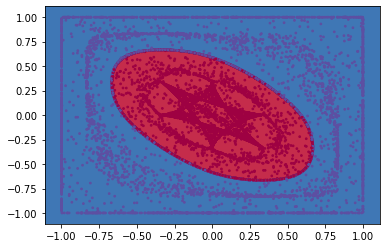

Epoch  4560 Loss  0.1617329865694046
Training accuracy is  0.9438810006761326
Epoch  4570 Loss  0.16500966250896454
Training accuracy is  0.942453609796409
Epoch  4580 Loss  0.16458137333393097
Training accuracy is  0.9380963113214634
Epoch  4590 Loss  0.1648220717906952
Training accuracy is  0.9395988280369619
Epoch  4600 Loss  0.1613771766424179
Training accuracy is  0.9401998347231613
Epoch  4610 Loss  0.1648670881986618
Training accuracy is  0.94140184809556
Epoch  4620 Loss  0.16328614950180054
Training accuracy is  0.9368191721132898
Epoch  4630 Loss  0.1603832095861435
Training accuracy is  0.9423784839606341
Epoch  4640 Loss  0.15736709535121918
Training accuracy is  0.9425287356321839
Epoch  4650 Loss  0.15987156331539154
Training accuracy is  0.9451581398843062
Epoch  4660 Loss  0.1597474366426468
Training accuracy is  0.9432799939899331
Epoch  4670 Loss  0.1591564267873764
Training accuracy is  0.947261663286004
Epoch  4680 Loss  0.16032078862190247
Training accuracy is  0.9

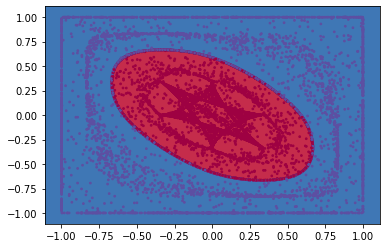

Epoch  4840 Loss  0.15997566282749176
Training accuracy is  0.9436556231688078
Epoch  4850 Loss  0.16297604143619537
Training accuracy is  0.9441815040192322
Epoch  4860 Loss  0.16361522674560547
Training accuracy is  0.9403500863947112
Epoch  4870 Loss  0.16662688553333282
Training accuracy is  0.940500338066261
Epoch  4880 Loss  0.16382302343845367
Training accuracy is  0.9380211854856886
Epoch  4890 Loss  0.16218842566013336
Training accuracy is  0.941476973931335
Epoch  4900 Loss  0.15957987308502197
Training accuracy is  0.939448576365412
Epoch  4910 Loss  0.1587258279323578
Training accuracy is  0.9445571331981069
Epoch  4920 Loss  0.15605990588665009
Training accuracy is  0.9438810006761326
Epoch  4930 Loss  0.16000020503997803
Training accuracy is  0.9442566298550071
Epoch  4940 Loss  0.16014166176319122
Training accuracy is  0.941476973931335
Epoch  4950 Loss  0.15932691097259521
Training accuracy is  0.9457591465705056
Epoch  4960 Loss  0.15860779583454132
Training accuracy i

In [ ]:
# define NN

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 20)
        # self.fc7 = nn.Linear(30, 30)
        #self.fc8 = nn.Linear(30, 30)
        self.fc9 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        # x = F.relu(self.fc7(x))
        #x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 3)
    plt.xlim(-1.11, 1.11)
    plt.ylim(-1.11, 1.11)
    #plt.close()
        
def plot_decision_boundary(X, y):
    # Set min and max values and give it some padding
    x_min, x_max = -1.5, 1.5
    y_min, y_max = -1.5, 1.5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 3)
    plt.xlim(-1.11, 1.11)
    plt.ylim(-1.11, 1.11)
    plt.show()

# load data
data_ellipse = pd.read_csv('/content/drive/MyDrive/475 Time Series/Project 2/FeedForward_Data_ellipse(1).csv')
X_ellipse = data_ellipse.values[:, 0:2]
y_ellipse = data_ellipse.values[:, 2]
X_ellipse = torch.tensor(X_ellipse, dtype=torch.float)
y_ellipse = torch.tensor(y_ellipse, dtype=torch.long)

bestAccuracy = 0.0
bestEpoch = 0
bestLoss = 0.0
#bestseed = 0

#for seed in range(701,800):
    
torch.manual_seed(396)

# train
net = Net()


nepochs = 5000
data, target = X_ellipse, y_ellipse

# create a stochastic gradient descent optimizer
learning_rate = .002
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()

# run the main training loop
for epoch in range(nepochs):


    # forward propagate
    net_out = net(data)

    # compute loss
    loss = criterion(net_out, target)

    optimizer.zero_grad()

    # backpropagate
    loss.backward()

    # update parameters
    optimizer.step()


    # print out report
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)

        if accuracy > bestAccuracy:
            bestAccuracy = accuracy
            bestEpoch = epoch
            bestLoss = loss.item()


        # plot the decision boundaries only for the network that has 95% accuracy or above
        if accuracy > 0.948:
            plot_decision_boundary(data, target)


print("\nThe best accuracy is:", bestAccuracy, "\nThe best epoch is at:", bestEpoch, "\nThe best loss is:", bestLoss)

**2.a Comments:** We used 5 hidden layers with 20 neurons at each layer, ReLu as activation function, Cross-Entropy as loss function, and Adam as optimizer in our network.
*   Best Accuracy 0.9489895575088273
*   Best Cross-Entropy loss 0.1709190160036087
*   Best Epoch 2260 
*   Hidden layer 5
*   Active function: ReLu
*   Number of Neuron per layer: 20

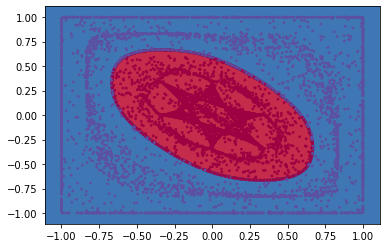

##Q2.b

Plot 2.b data

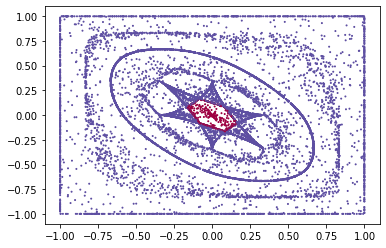

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/475 Time Series/Project 2/FeedForward_Data_hexa(1).csv") 
X = data.values[:, 0:2]  # Take only the first two features. 
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
plt.show()

2.b



*   Best Accuracy 0.9794155209976712 0.973705957478777 8615
*   Best Cross-Entropy loss 0.04449339583516121 0.05627008527517319 9884



*   Active function: ReLu
*   Number of Neuron per layer: 20

In [ ]:
class Net_hexa(nn.Module):

    def __init__(self):
        super(Net_hexa, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 20)
        self.fc7 = nn.Linear(20, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return F.log_softmax(x,dim = -1)

def plot_decision_boundary(net, X, y, filename):
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    h = 0.02
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=1)
    plt.savefig(filename)
    plt.close()



'''2.2 Use Feedforward_Data_hexa.csv to create and train a network that separates the data.'''
# load data
data_hexa = pd.read_csv('/content/drive/MyDrive/475 Time Series/Project 2/FeedForward_Data_hexa(1).csv')
X_hexa = data_hexa.values[:, 0:2]
y_hexa = data_hexa.values[:, 2]
X_hexa = torch.tensor(X_hexa, dtype=torch.float)
y_hexa = torch.tensor(y_hexa, dtype=torch.long)

# create and train network
learning_rate = 0.1
nepochs = 10000
accuracy_hist = []
loss_hist = []
net_hexa = Net_hexa()
optimizer = torch.optim.SGD(net_hexa.parameters(), lr=learning_rate, momentum=0.9)
data, target = X_hexa, y_hexa
for epoch in range(nepochs):
    optimizer.zero_grad()
    hexa_out = net_hexa(data)
    loss = criterion(hexa_out, target)
    loss.backward()
    optimizer.step()
    hexa_out = net_hexa(data)
    pred = hexa_out.data.max(1)[1]  # get the index of the max log-probability
    correctidx = pred.eq(target.data)
    ncorrect = correctidx.sum()
    accuracy = ncorrect.item() / len(data)
    accuracy_hist.append(accuracy)
    loss_hist.append(loss.item())
    if epoch % 10 == 0:
        # monitor loss
        print('Epoch ', epoch, 'Loss ', loss.item())
        print('Training accuracy is ', accuracy)
plot_decision_boundary(net_hexa, X_hexa, y_hexa, '2.2 Feedforward_Data_hexa.pdf')
print('Best Accuracy', max(accuracy_hist), accuracy_hist[-1], accuracy_hist.index(max(accuracy_hist)))
print('Best Cross-Entropy loss', min(loss_hist), loss_hist[-1], loss_hist.index(min(loss_hist)))

Epoch  0 Loss  0.6997416019439697
Training accuracy is  0.940575463902036
Epoch  10 Loss  0.24392491579055786
Training accuracy is  0.940575463902036
Epoch  20 Loss  0.2680127024650574
Training accuracy is  0.940575463902036
Epoch  30 Loss  0.22564145922660828
Training accuracy is  0.940575463902036
Epoch  40 Loss  0.22818946838378906
Training accuracy is  0.940575463902036
Epoch  50 Loss  0.2258104681968689
Training accuracy is  0.940575463902036
Epoch  60 Loss  0.22548137605190277
Training accuracy is  0.940575463902036
Epoch  70 Loss  0.2255191206932068
Training accuracy is  0.940575463902036
Epoch  80 Loss  0.22539131343364716
Training accuracy is  0.940575463902036
Epoch  90 Loss  0.22539621591567993
Training accuracy is  0.940575463902036
Epoch  100 Loss  0.22539058327674866
Training accuracy is  0.940575463902036
Epoch  110 Loss  0.22538568079471588
Training accuracy is  0.940575463902036
Epoch  120 Loss  0.22538580000400543
Training accuracy is  0.940575463902036
Epoch  130 Los